Enter here

<h1>Forecasting number of Air Passengers for next 1 years</h1>

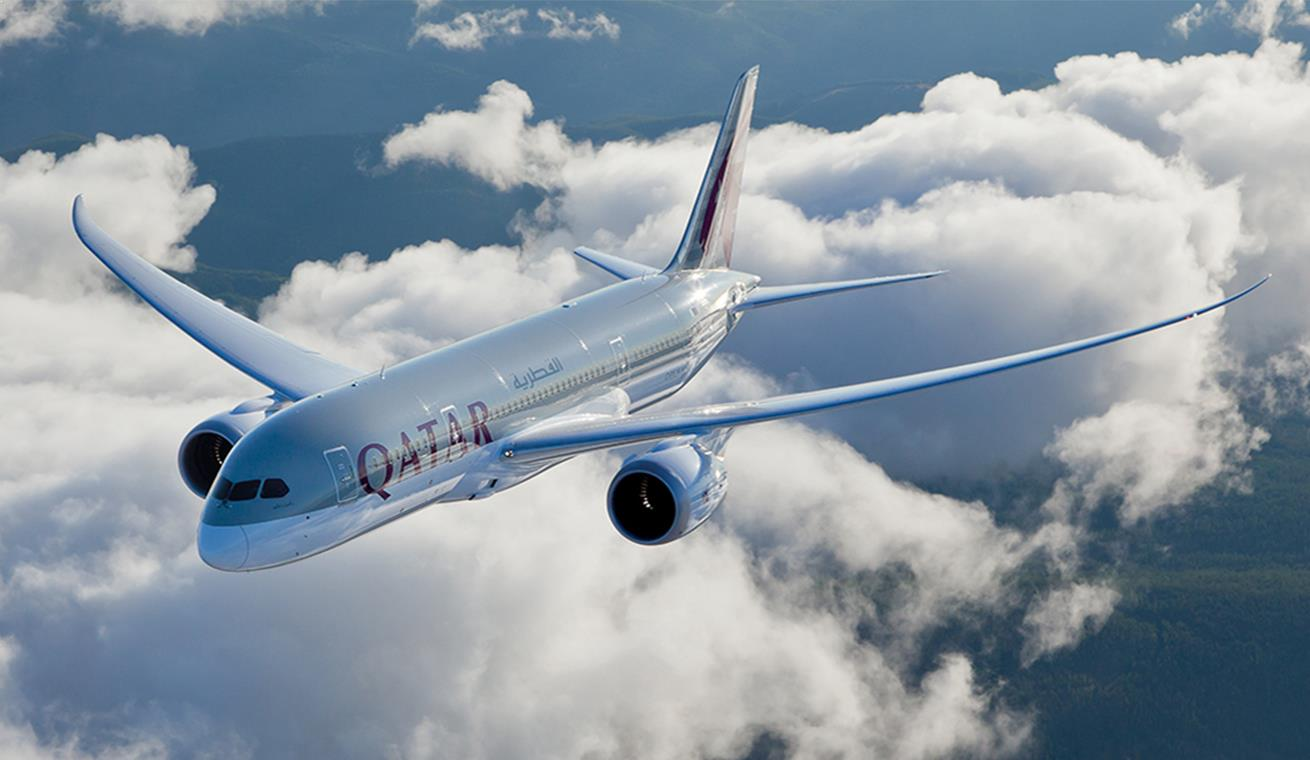

- Importing all the required libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- Reading the dataset file and checking the size of file

In [2]:
data=pd.read_csv(r'Data\maliwada.csv')
data.shape

(394, 2)

In [3]:
WINDOW_SIZE = 14

- Creating the 'Date' as Index for data and viewing the dataset

In [4]:
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)
data=data.set_index(['date'])
print(data.head())
print(data.tail())

            weight
date              
2020-02-01    8972
2020-02-02   10806
2020-02-03    7911
2020-02-04   11536
2020-02-05    7022
            weight
date              
2021-02-24   10168
2021-02-25    8942
2021-02-26    9115
2021-02-27    8830
2021-02-28    9574


- Visualizing the Time Series plot for the number of Air Passengers 

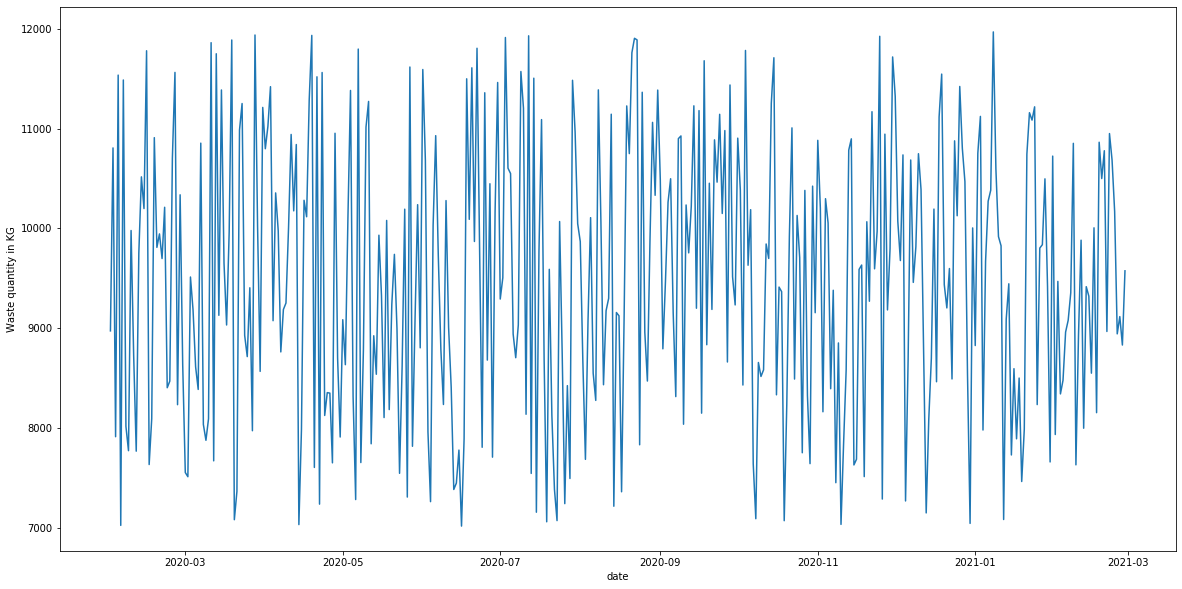

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("Waste quantity in KG")
plt.plot(data)

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [6]:
rolmean=data.rolling(window=WINDOW_SIZE).mean()
rolstd=data.rolling(window=WINDOW_SIZE).std()
print(rolmean.head(15))
print(rolstd.head(15))

                 weight
date                   
2020-02-01          NaN
2020-02-02          NaN
2020-02-03          NaN
2020-02-04          NaN
2020-02-05          NaN
2020-02-06          NaN
2020-02-07          NaN
2020-02-08          NaN
2020-02-09          NaN
2020-02-10          NaN
2020-02-11          NaN
2020-02-12          NaN
2020-02-13          NaN
2020-02-14  9318.357143
2020-02-15  9518.928571
                 weight
date                   
2020-02-01          NaN
2020-02-02          NaN
2020-02-03          NaN
2020-02-04          NaN
2020-02-05          NaN
2020-02-06          NaN
2020-02-07          NaN
2020-02-08          NaN
2020-02-09          NaN
2020-02-10          NaN
2020-02-11          NaN
2020-02-12          NaN
2020-02-13          NaN
2020-02-14  1490.733511
2020-02-15  1623.534628


- Plotting the Rolling Mean and Standard Deviation, which has window of 12
- By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

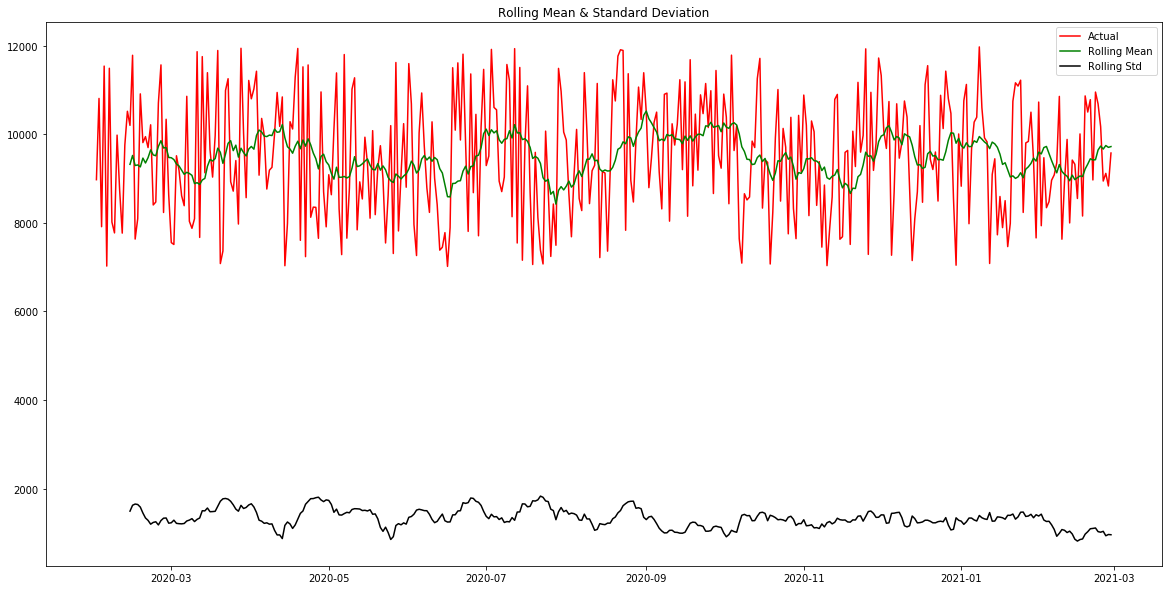

In [7]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['weight'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic          -19.674015
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              393.000000
Critical Value (1%)      -3.447099
Critical Value (5%)      -2.868923
Critical Value (10%)     -2.570703
dtype: float64


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

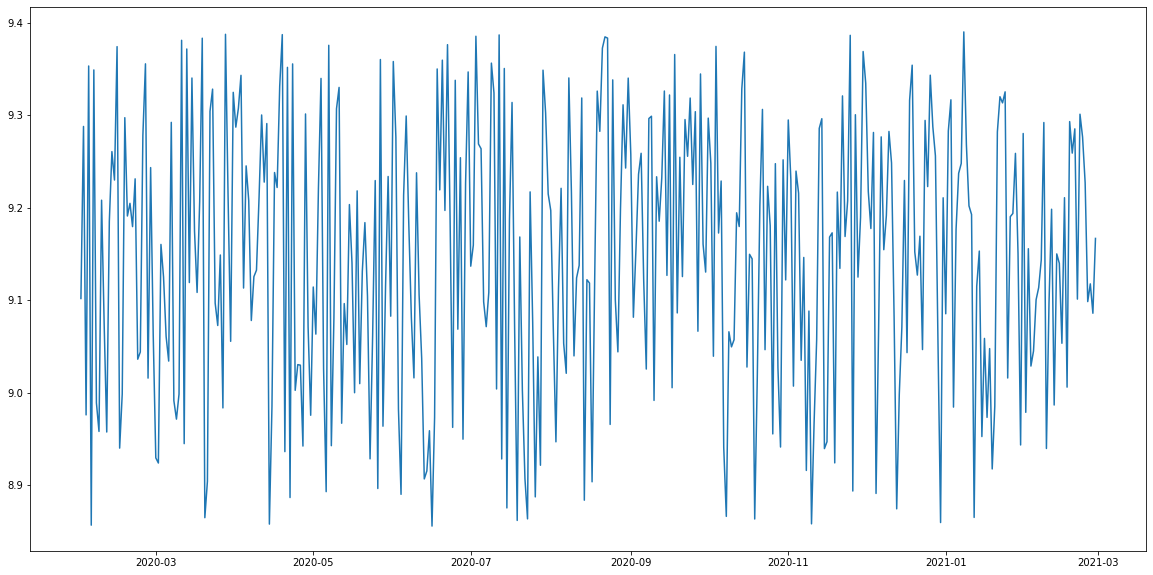

In [9]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

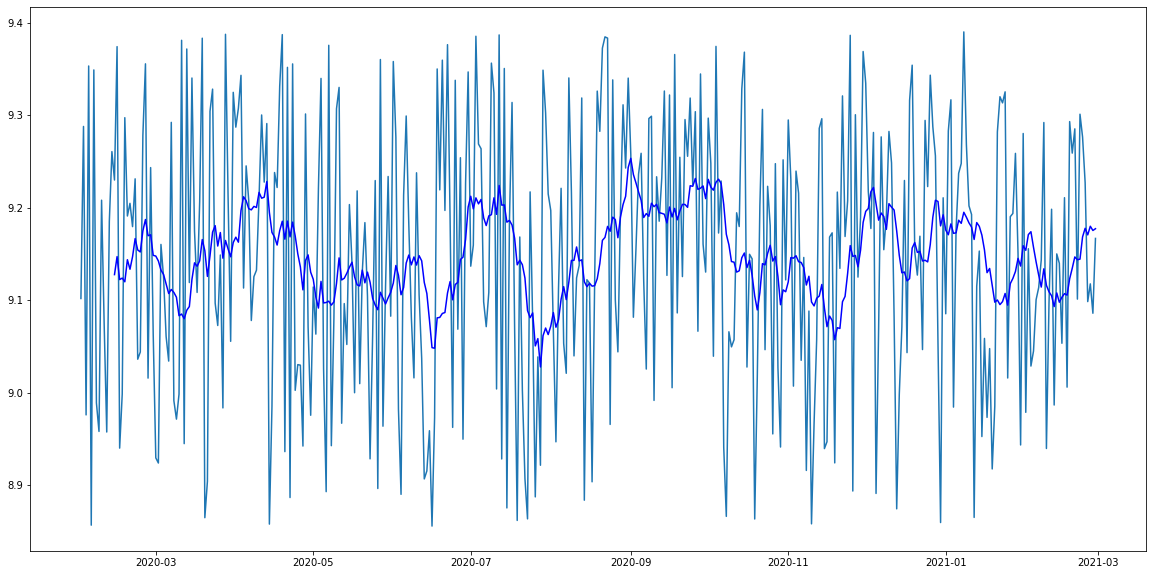

In [10]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=WINDOW_SIZE).mean()
MStd=data_log.rolling(window=WINDOW_SIZE).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

- Using another method differencing, to make our time series stationary

In [11]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

weight
date              
2020-02-01     NaN
2020-02-02     NaN
2020-02-03     NaN
2020-02-04     NaN
2020-02-05     NaN
2020-02-06     NaN
2020-02-07     NaN
2020-02-08     NaN
2020-02-09     NaN
2020-02-10     NaN
2020-02-11     NaN
2020-02-12     NaN

- Output of differencing method, after dropping null values

In [12]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

weight
date                
2020-02-14  0.102260
2020-02-15  0.227022
2020-02-16 -0.182192
2020-02-17 -0.125282
2020-02-18  0.177422

- Defining function for Rolling Mean and Standard Deviation & ADF test

In [13]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['weight'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

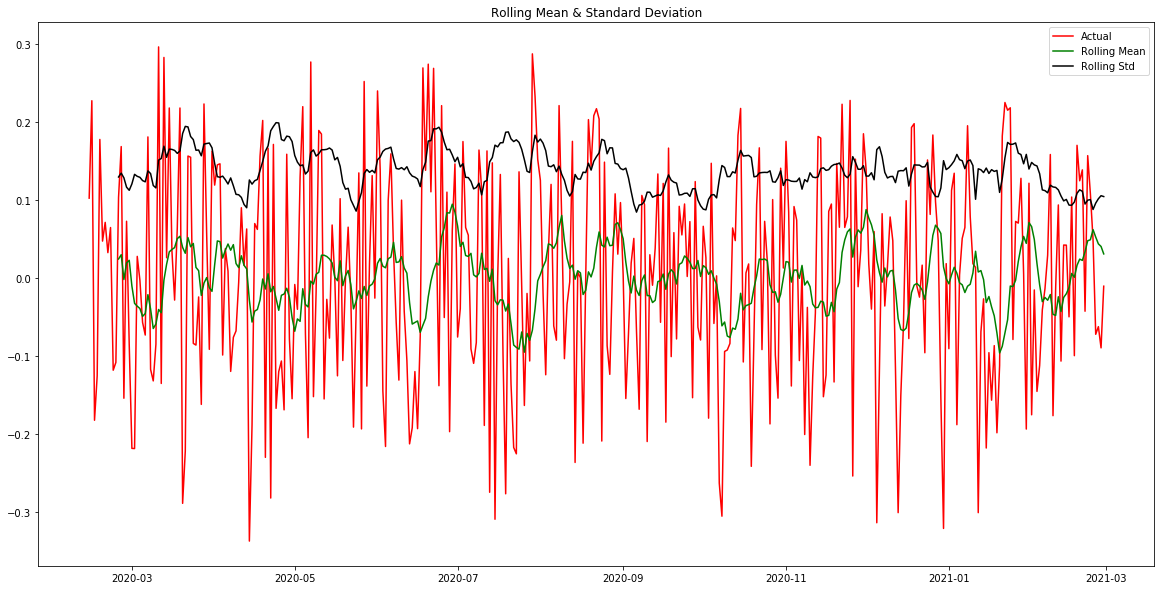

Dickey-Fuller Test: 
Test Statistic          -18.986044
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              380.000000
Critical Value (1%)      -3.447676
Critical Value (5%)      -2.869176
Critical Value (10%)     -2.570838
dtype: float64


In [14]:
stationarity(data_log_diff)

- Checking for Trend stationarity and performing exponential transformation on our data

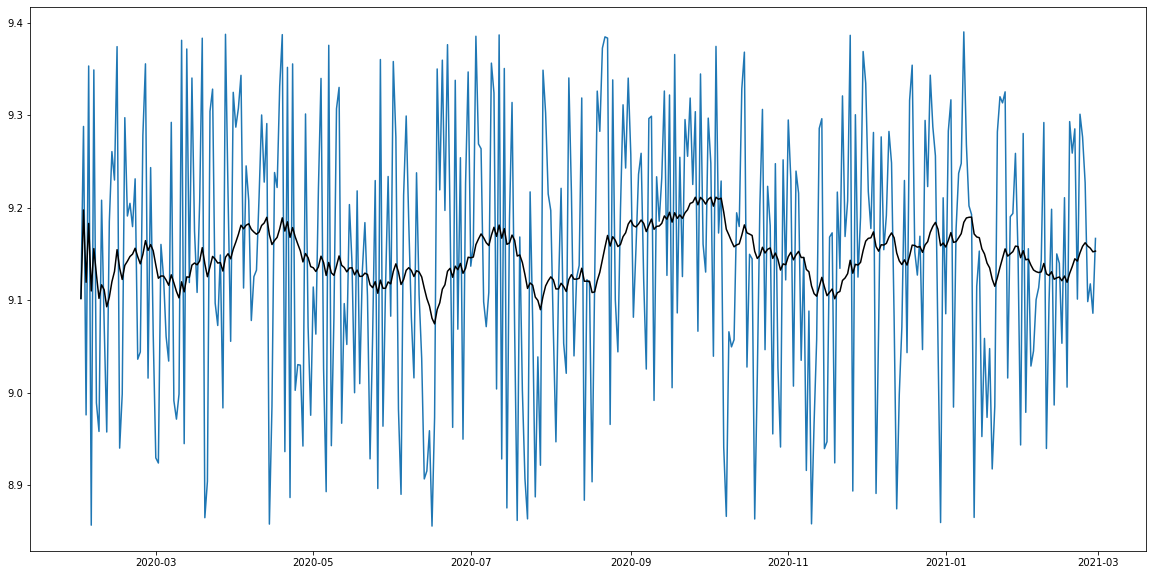

In [15]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

- Since log transformation is non-stationary, applying differencing on our data.

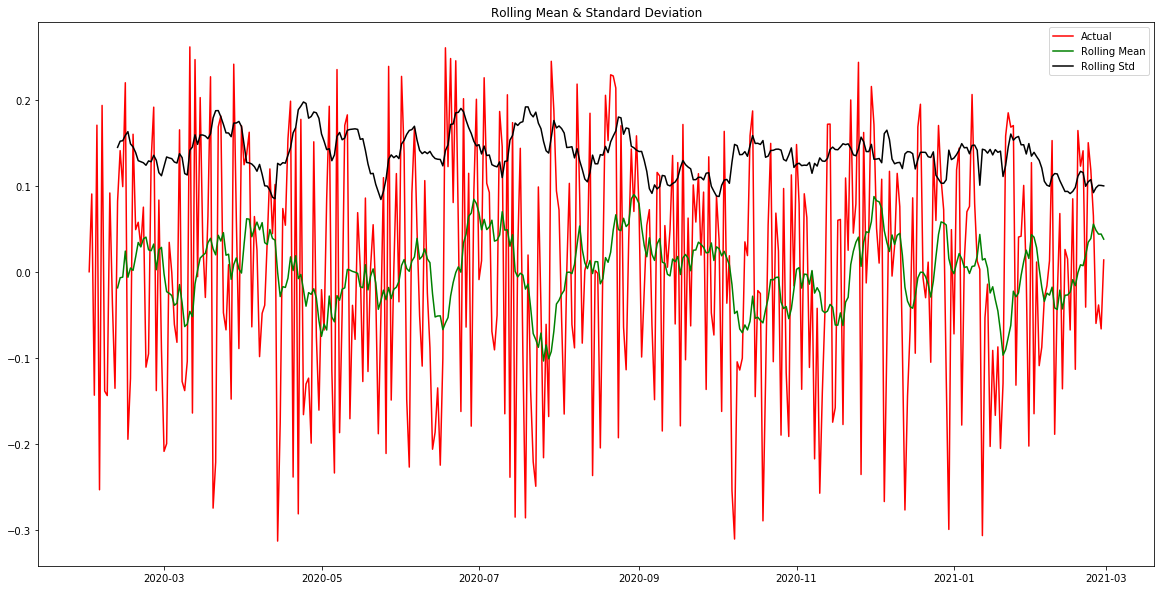

Dickey-Fuller Test: 
Test Statistic          -20.050170
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              393.000000
Critical Value (1%)      -3.447099
Critical Value (5%)      -2.868923
Critical Value (10%)     -2.570703
dtype: float64


In [16]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

- From above graph and ADF test, we conclude, it is trend stationary

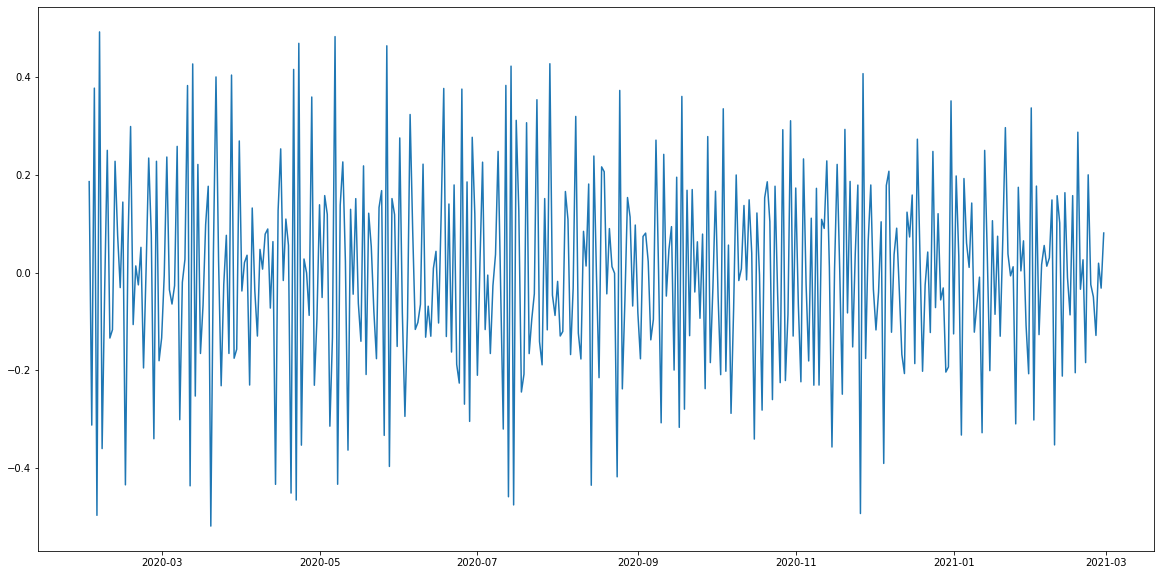

In [17]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

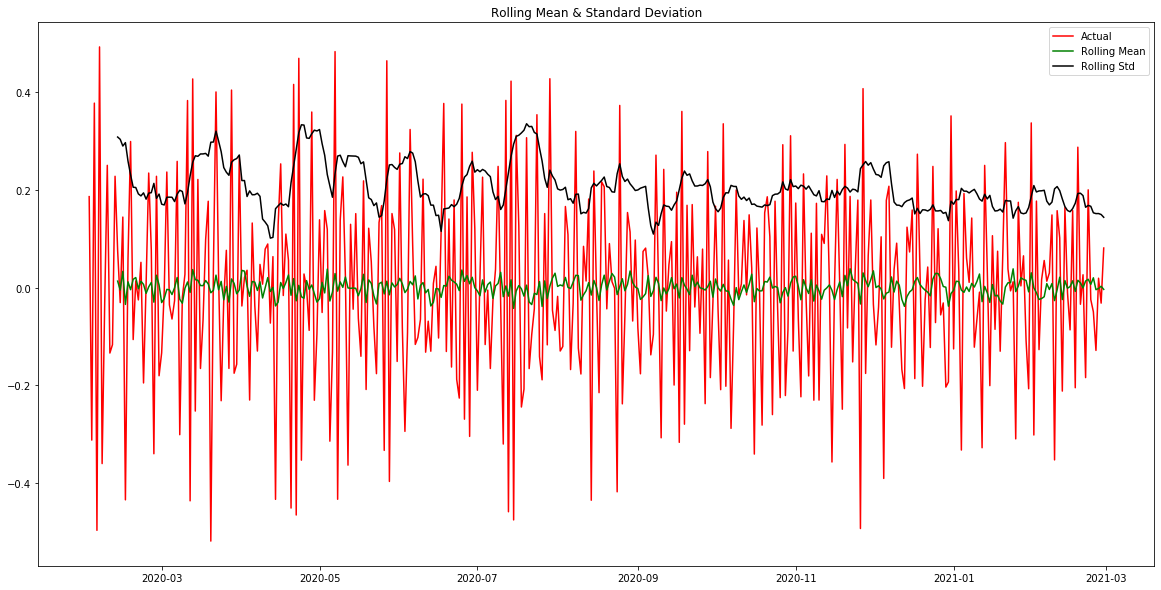

Dickey-Fuller Test: 
Test Statistic         -1.008899e+01
p-value                 1.135344e-17
Lags Used               1.000000e+01
No. of Obs              3.820000e+02
Critical Value (1%)    -3.447585e+00
Critical Value (5%)    -2.869136e+00
Critical Value (10%)   -2.570816e+00
dtype: float64


In [18]:
data_shift=data_shift.dropna()
stationarity(data_shift)

- Decomposing Time Series into its components : Trend, Seasonality and Residual

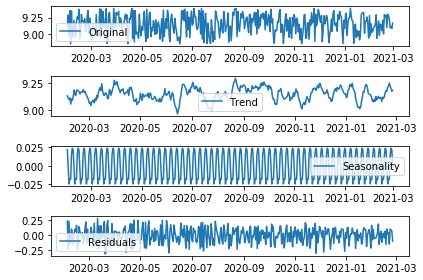

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- Checking the stationarity of Time Series components

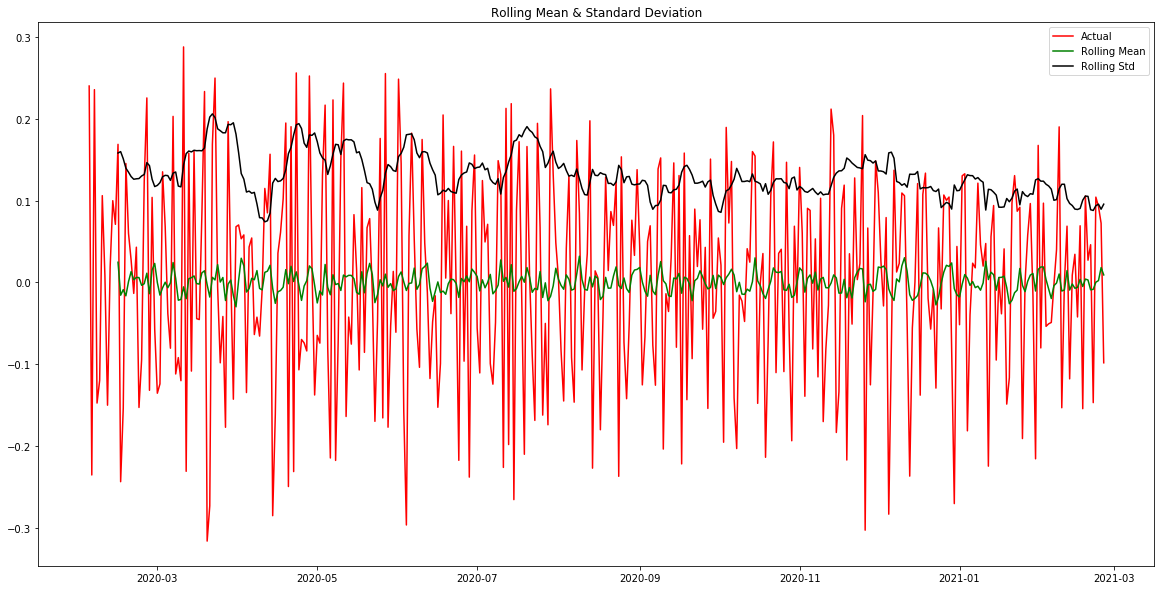

Dickey-Fuller Test: 
Test Statistic         -9.258170e+00
p-value                 1.430817e-15
Lags Used               1.600000e+01
No. of Obs              3.710000e+02
Critical Value (1%)    -3.448100e+00
Critical Value (5%)    -2.869362e+00
Critical Value (10%)   -2.570937e+00
dtype: float64


In [20]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

- Plotting the ACF and PACF to find q and p value
- We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

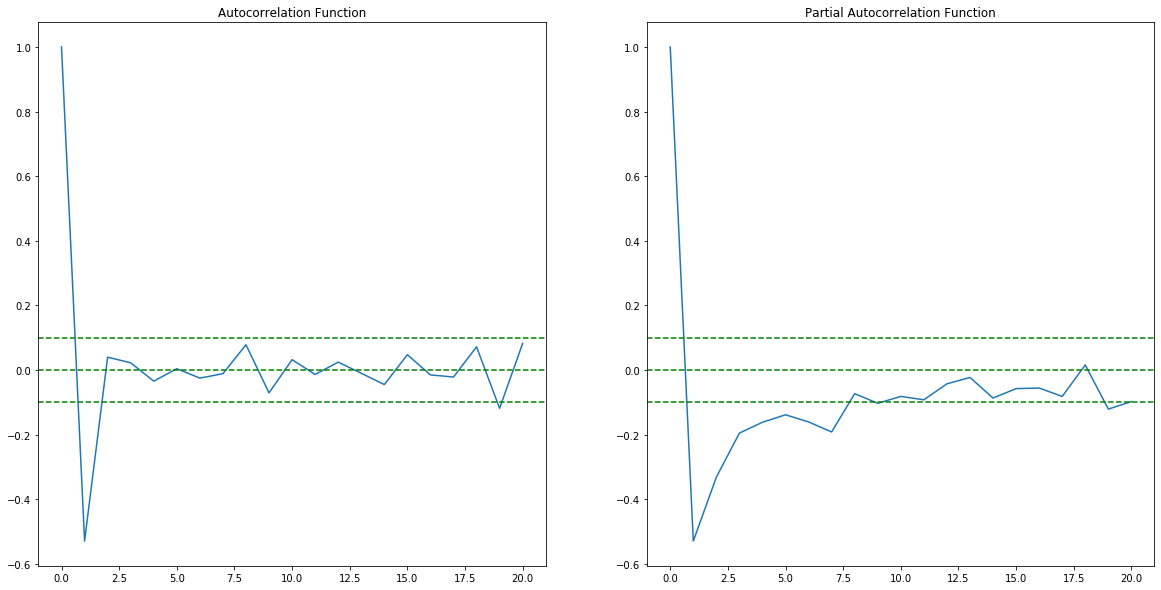

In [21]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

- Building the ARIMA model with p=2, q=2 and I=1

D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


plotting ARIMA model


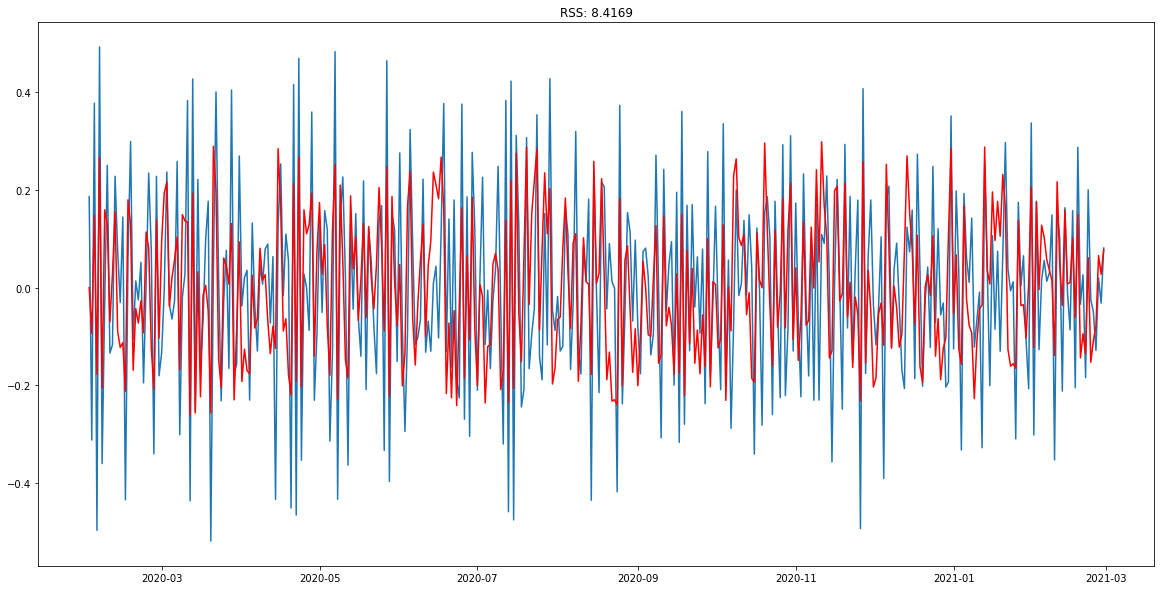

In [22]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['weight'])**2))
print('plotting ARIMA model')

- Predicted values from ARIMA model in difference form

In [23]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

date
2020-02-02    0.000036
2020-02-03   -0.093492
2020-02-04    0.147845
2020-02-05   -0.177301
2020-02-06    0.265949
dtype: float64


- Performing Inverse Transformation for differencing, by doing cumulative sum

In [24]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

date
2020-02-02    0.000036
2020-02-03   -0.093456
2020-02-04    0.054390
2020-02-05   -0.122911
2020-02-06    0.143037
dtype: float64


- Below is data display of predicted value in log scale

In [25]:
predictions_log=pd.Series(data_log['weight'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

date
2020-02-01    9.101864
2020-02-02    9.101900
2020-02-03    9.008408
2020-02-04    9.156253
2020-02-05    8.978953
dtype: float64

Taking out log transformation and visualizing actual vs predicted value graph

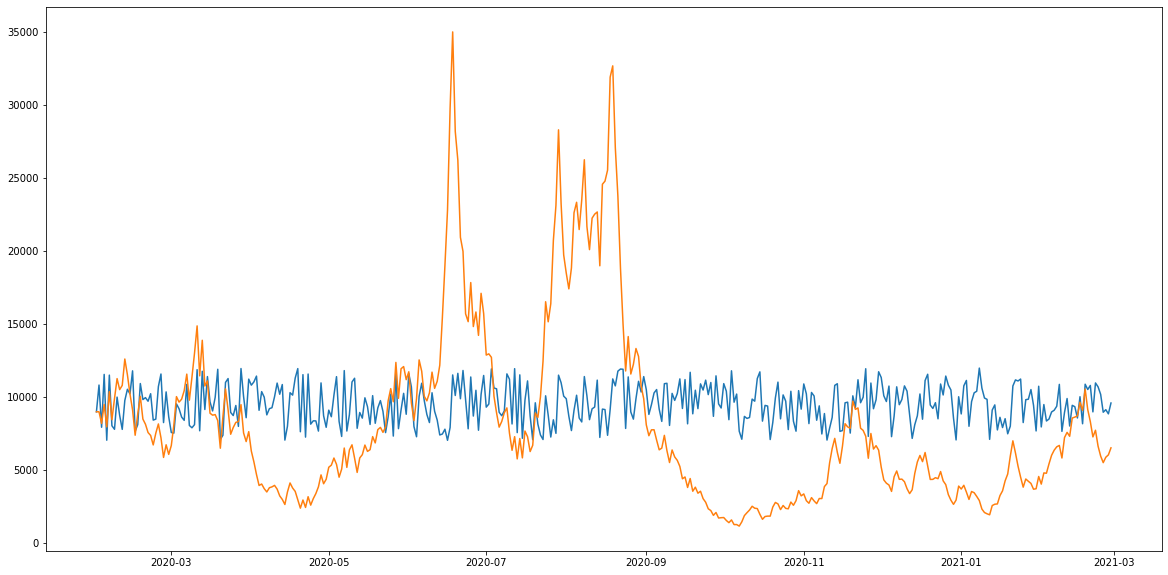

In [26]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

- Plotting the visual for forecast of next 10 years with 95% confidence interval

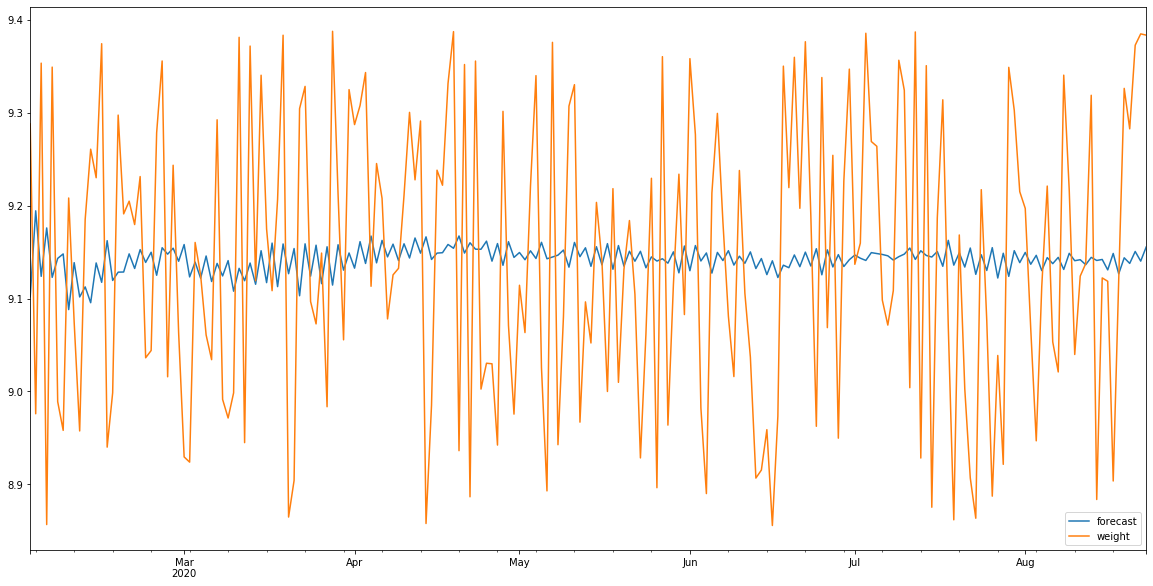

In [27]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

- Next 10 years predicted value on log scale

In [28]:
x[0]

array([9.14598664, 9.16465239, 9.1463649 , 9.16436959, 9.14678483,
       9.16410199, 9.14719152, 9.16384742, 9.14758544, 9.16360538,
       9.14796707, 9.16337539, 9.14833689, 9.16315698, 9.14869534,
       9.16294972, 9.14904286, 9.16275318, 9.14937987, 9.16256694,
       9.14970677, 9.16239062, 9.15002395, 9.16222384, 9.15033178,
       9.16206622, 9.15063062, 9.16191742, 9.15092081, 9.1617771 ,
       9.15120268, 9.16164494, 9.15147655, 9.16152063, 9.15174274,
       9.16140385, 9.15200152, 9.16129434, 9.15225318, 9.1611918 ,
       9.15249801, 9.16109597, 9.15273625, 9.1610066 , 9.15296816,
       9.16092343, 9.15319399, 9.16084623, 9.15341396, 9.16077478,
       9.1536283 , 9.16070884, 9.15383723, 9.16064822, 9.15404094,
       9.1605927 , 9.15423966, 9.1605421 , 9.15443355, 9.16049621,
       9.15462281, 9.16045487, 9.15480762, 9.1604179 , 9.15498814,
       9.16038514, 9.15516454, 9.16035641, 9.15533698, 9.16033157,
       9.1555056 , 9.16031047, 9.15567056, 9.16029296, 9.15583

- Actual predicted value for next 10 years, after taking out log transformation

In [29]:
np.exp(x[0])

array([9376.73252994, 9553.40002931, 9380.28005594, 9550.69868777,
       9384.2199252 , 9548.14326721, 9388.03720544, 9545.71289627,
       9391.73605509, 9543.40270839, 9395.32092556, 9541.20804234,
       9398.79610413, 9539.12442047, 9402.16571943, 9537.14754117,
       9405.43374706, 9535.27327185, 9408.60401516, 9533.49764209,
       9411.68020967, 9531.8168371 , 9414.66587947, 9530.22719152,
       9417.56444134, 9528.7251834 , 9420.37918476, 9527.30742848,
       9423.11327652, 9525.97067469, 9425.76976518, 9524.71179686,
       9428.35158542, 9523.5277917 , 9430.86156213, 9522.41577295,
       9433.30241451, 9521.37296671, 9435.67675987, 9520.39670701,
       9437.98711745, 9519.48443155, 9440.23591195, 9518.63367756,
       9442.42547706, 9517.84207793, 9444.55805881, 9517.10735737,
       9446.6358188 , 9516.42732888, 9448.66083732, 9515.79989017,
       9450.63511638, 9515.22302044, 9452.56058259, 9514.69477711,
       9454.43908997, 9514.21329277, 9456.27242267, 9513.77677

<b>*************************End****************************</b>